In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import pandas as pd
from sklearn import model_selection, linear_model



In [2]:
#load data 
data = pd.read_csv('data/hour.csv', sep=',', header=0,)
#convert to numpy array
data_array = np.array(data)
#data_array.shape

In [3]:
# # splitting training and testing data (features)
X = data_array[:,:-3]
# remove date column (second column)
X = np.delete(X, 1, 1)
# remove column with hours
#X = np.delete(X,5,1) 

# splitting training and testing data (targer)
y_casual = data_array[:,-3]
y_registered = data_array[:,-2]
y_cnt = data_array[:,-1]

In [4]:
# split the data for training 
X_train, X_test, y_casual_train, y_casual_test = model_selection.train_test_split(X, y_casual, test_size=0.2)
#y_casual_train = y_casual_train[:,np.newaxis]
#y_casual_test = y_casual_test[:,np.newaxis]

print(X_train.shape, X_test.shape,y_casual_train.shape, y_casual_test.shape )

(13903, 13) (3476, 13) (13903,) (3476,)


In [5]:
# idk why but we need to change type even thou type(y_casual) output is the same before and after 
# but it fixes following error 
# ValueError: Unknown label type: 'unknown'
y_casual_train=y_casual_train.astype('int')
y_casual_test=y_casual_test.astype('int')


In [6]:

regr = linear_model.LinearRegression()# fit classifier 
regr.fit(X_train, y_casual_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_casual_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_casual_test))


Coefficients: [  1.77792317e-04   1.67606744e+00   8.54733687e+00  -1.12784497e-01
   1.20330055e+00  -1.15221182e+01   9.29099212e-01  -3.53027087e+01
   1.72466085e+00   5.18677742e+01   6.32611734e+01  -6.96899965e+01
   3.59475540e+00]
Residual sum of squares: 1330.33
Variance score: 0.45


In [8]:
X_test.shape

(3476, 13)

In [9]:
y_casual_test.shape

(3476,)

In [10]:
y_casual_test.resize(X_test.shape)

In [11]:
y_casual_test

array([[  7,   4,   4, ..., 228,  30,  10],
       [ 47,  29,  10, ..., 155, 146,  26],
       [  1,  60,  40, ..., 288,  37,  22],
       ..., 
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

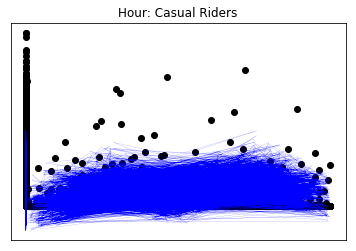

In [12]:
# visualize w/plot 

# Plot outputs
plt.scatter(X_test, y_casual_test,  color='black')
plt.plot(X_test, regr.predict(X_test), color='blue',
         linewidth=0.1)

plt.xticks(())
plt.yticks(())
plt.title('Hour: Casual Riders')
plt.show()